In [15]:
import os
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data from a CSV file
file_path = os.path.join('..', 'Dataset', 'data.csv')
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,datetime,temp,dew,humidity,windspeed
0,2023-08-10T00:00:00,28.0,26.0,88.92,16.6
1,2023-08-10T01:00:00,28.0,26.0,88.92,14.8
2,2023-08-10T02:00:00,27.9,25.2,85.28,6.9
3,2023-08-10T03:00:00,28.0,26.0,88.92,7.6
4,2023-08-10T04:00:00,28.0,26.0,88.92,14.8


In [3]:
# Convert 'datetime' to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

df.head(24)

,temp,dew,humidity,windspeed
datetime,,,,
2023-08-10 00:00:00,28.0,26.0,88.92,16.6
2023-08-10 01:00:00,28.0,26.0,88.92,14.8
2023-08-10 02:00:00,27.9,25.2,85.28,6.9
2023-08-10 03:00:00,28.0,26.0,88.92,7.6
2023-08-10 04:00:00,28.0,26.0,88.92,14.8
2023-08-10 05:00:00,28.0,25.3,85.29,3.9
2023-08-10 06:00:00,27.0,26.0,94.27,9.4
2023-08-10 07:00:00,28.0,25.7,87.28,13.1
2023-08-10 08:00:00,28.1,26.0,88.71,5.5


# Autoregression (AR)

The autoregression (AR) method predicts the subsequent value in a sequence using a linear combination of previous observations. 

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is best suited for single-variable time series that lack trend and seasonal components.

# Example

[1.606475804265477, 2.0528871624728824, 3.3510638250265448, 4.202126575633575, 5.051321878267424, 6.31653823300866, 7.6671867703547925, 8.734160150056017, 9.071272411026088, 10.379800148235828, 11.286836069892617, 12.709544165448182, 13.717618142854894, 14.290551946699402, 15.657681722404902, 16.515763868857462, 17.316320904301264, 18.034532376062163, 19.0563946058564, 20.275738820569632, 21.966319075151024, 22.78623361960754, 23.786944699858573, 24.83829198862782, 25.166330827979863, 26.029495509389555, 27.472675521865554, 28.90124173011169, 29.15887157445701, 30.0563947078498, 31.474449283025518, 32.709465905299155, 33.48344671745039, 34.952621285457376, 35.56584538384878, 36.940563640529504, 37.559522933822024, 38.801677997236574, 39.39895019280923, 40.510843204063306, 41.23401905645023, 42.2017498690267, 43.793294398911165, 44.05559857234898, 45.32846628558527, 46.51815811322434, 47.20998094441331, 48.64709070278121, 49.92186543388154, 50.770735550370084, 51.761985358416936, 52.631

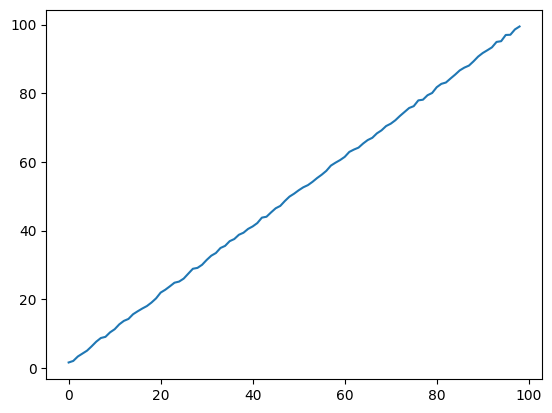

[100.46784276]


In [12]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]
print(f"data : {data}")

plt.plot(data)
plt.show()

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


In [13]:
# Split data into training and test sets (use the last 24 hours as test set)
train_data = df['temp'][:-24]
test_data = df['temp'][-24:]

# Train the Autoregression model
model = AutoReg(train_data, lags=24)  # 24 lag hours
model_fitted = model.fit()


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [17]:
# Save the trained model
with open('temperature_ar_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_ar_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")

Model trained and saved.
Model loaded.


In [31]:
# Make predictions for the next 24 hours
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Next 24-hour temperature predictions : \n")
print(round(predictions,1))

Next 24-hour temperature predictions : 

2024-08-26 00:00:00    27.7
2024-08-26 01:00:00    27.3
2024-08-26 02:00:00    26.9
2024-08-26 03:00:00    27.0
2024-08-26 04:00:00    26.8
2024-08-26 05:00:00    26.4
2024-08-26 06:00:00    26.8
2024-08-26 07:00:00    27.2
2024-08-26 08:00:00    27.2
2024-08-26 09:00:00    27.5
2024-08-26 10:00:00    27.9
2024-08-26 11:00:00    28.0
2024-08-26 12:00:00    27.8
2024-08-26 13:00:00    27.8
2024-08-26 14:00:00    27.7
2024-08-26 15:00:00    27.4
2024-08-26 16:00:00    27.3
2024-08-26 17:00:00    27.5
2024-08-26 18:00:00    27.6
2024-08-26 19:00:00    27.6
2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [25]:
len(train_data), len(train_data) + 23

(9168, 9191)

In [29]:
# Make predictions for the next 24 hours
predictions = loaded_model.predict(start=len(train_data) + 20, end=len(train_data) + 40)

# Display the predictions
print("Next 24-hour temperature predictions : \n")
print(round(predictions,1))

Next 24-hour temperature predictions : 

2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
2024-08-27 00:00:00    27.7
2024-08-27 01:00:00    27.5
2024-08-27 02:00:00    27.2
2024-08-27 03:00:00    27.0
2024-08-27 04:00:00    27.0
2024-08-27 05:00:00    26.9
2024-08-27 06:00:00    26.9
2024-08-27 07:00:00    27.1
2024-08-27 08:00:00    27.3
2024-08-27 09:00:00    27.5
2024-08-27 10:00:00    27.7
2024-08-27 11:00:00    27.8
2024-08-27 12:00:00    27.8
2024-08-27 13:00:00    27.8
2024-08-27 14:00:00    27.7
2024-08-27 15:00:00    27.6
2024-08-27 16:00:00    27.6
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [30]:
test_data

datetime
2024-08-26 00:00:00    28.0
2024-08-26 01:00:00    28.0
2024-08-26 02:00:00    28.0
2024-08-26 03:00:00    28.0
2024-08-26 04:00:00    28.0
2024-08-26 05:00:00    28.0
2024-08-26 06:00:00    28.0
2024-08-26 07:00:00    28.0
2024-08-26 08:00:00    28.0
2024-08-26 09:00:00    28.5
2024-08-26 10:00:00    28.9
2024-08-26 11:00:00    28.9
2024-08-26 12:00:00    28.9
2024-08-26 13:00:00    28.9
2024-08-26 14:00:00    28.9
2024-08-26 15:00:00    28.9
2024-08-26 16:00:00    28.9
2024-08-26 17:00:00    28.9
2024-08-26 18:00:00    28.0
2024-08-26 19:00:00    28.0
2024-08-26 20:00:00    28.0
2024-08-26 21:00:00    28.0
2024-08-26 22:00:00    27.0
2024-08-26 23:00:00    28.0
Name: temp, dtype: float64

In [34]:
np.array(round(test_data,1)), np.array(round(predictions,1))

(array([28. , 28. , 28. , 28. , 28. , 28. , 28. , 28. , 28. , 28.5, 28.9,
        28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28. , 28. , 28. , 28. ,
        27. , 28. ]),
 array([27.7, 27.3, 26.9, 27. , 26.8, 26.4, 26.8, 27.2, 27.2, 27.5, 27.9,
        28. , 27.8, 27.8, 27.7, 27.4, 27.3, 27.5, 27.6, 27.6, 27.8, 27.9,
        27.9, 27.8]))

In [35]:
import numpy as np

def evaluate_time_series(actual, predicted):
    """
    Evaluate the performance of time series predictions using common error metrics.
    
    Parameters:
    actual (array-like): The actual values of the time series.
    predicted (array-like): The predicted values of the time series.
    
    Returns:
    dict: A dictionary containing MAE, MSE, RMSE, and MAPE values.
    """
    # Convert inputs to numpy arrays if they are not already
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate error metrics
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    # Return a dictionary of the results
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19


In [40]:
# Make predictions using specific datetime strings
start_date = '2024-08-01 00:00:00'
end_date = '2024-08-02 00:00:00'

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-01 00:00:00    27.8
2024-08-01 01:00:00    27.7
2024-08-01 02:00:00    27.8
2024-08-01 03:00:00    27.0
2024-08-01 04:00:00    27.0
2024-08-01 05:00:00    26.8
2024-08-01 06:00:00    27.3
2024-08-01 07:00:00    27.4
2024-08-01 08:00:00    28.1
2024-08-01 09:00:00    28.5
2024-08-01 10:00:00    29.5
2024-08-01 11:00:00    29.9
2024-08-01 12:00:00    29.8
2024-08-01 13:00:00    30.4
2024-08-01 14:00:00    29.9
2024-08-01 15:00:00    29.5
2024-08-01 16:00:00    29.2
2024-08-01 17:00:00    29.3
2024-08-01 18:00:00    28.8
2024-08-01 19:00:00    28.3
2024-08-01 20:00:00    27.7
2024-08-01 21:00:00    28.0
2024-08-01 22:00:00    27.6
2024-08-01 23:00:00    27.1
2024-08-02 00:00:00    27.3
Freq: H, dtype: float64


# Moving Average (MA)

The Moving Average (MA) method models predict the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

It’s important to note that a Moving Average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

We can use the ARIMA class to create an MA model and set a zeroth-order AR model. We must specify the order of the MA model in the order argument.

In [41]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_data, order=(0, 0, 1))
model_fit = model.fit()


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [42]:

# Save the trained model
with open('temperature_ma_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_ma_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")



Model trained and saved.
Model loaded.


In [43]:
# make prediction
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-26 00:00:00    27.7
2024-08-26 01:00:00    27.3
2024-08-26 02:00:00    26.9
2024-08-26 03:00:00    27.0
2024-08-26 04:00:00    26.8
2024-08-26 05:00:00    26.4
2024-08-26 06:00:00    26.8
2024-08-26 07:00:00    27.2
2024-08-26 08:00:00    27.2
2024-08-26 09:00:00    27.5
2024-08-26 10:00:00    27.9
2024-08-26 11:00:00    28.0
2024-08-26 12:00:00    27.8
2024-08-26 13:00:00    27.8
2024-08-26 14:00:00    27.7
2024-08-26 15:00:00    27.4
2024-08-26 16:00:00    27.3
2024-08-26 17:00:00    27.5
2024-08-26 18:00:00    27.6
2024-08-26 19:00:00    27.6
2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [44]:
# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19
